IRIS FLOWER CLASSIFICATION PROJECT
LetsGrowMore VIP
Name : Aryan S. Chaple

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline
from warnings import filterwarnings

In [2]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
# Load the data
data_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=columns)
data_set.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data_set.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


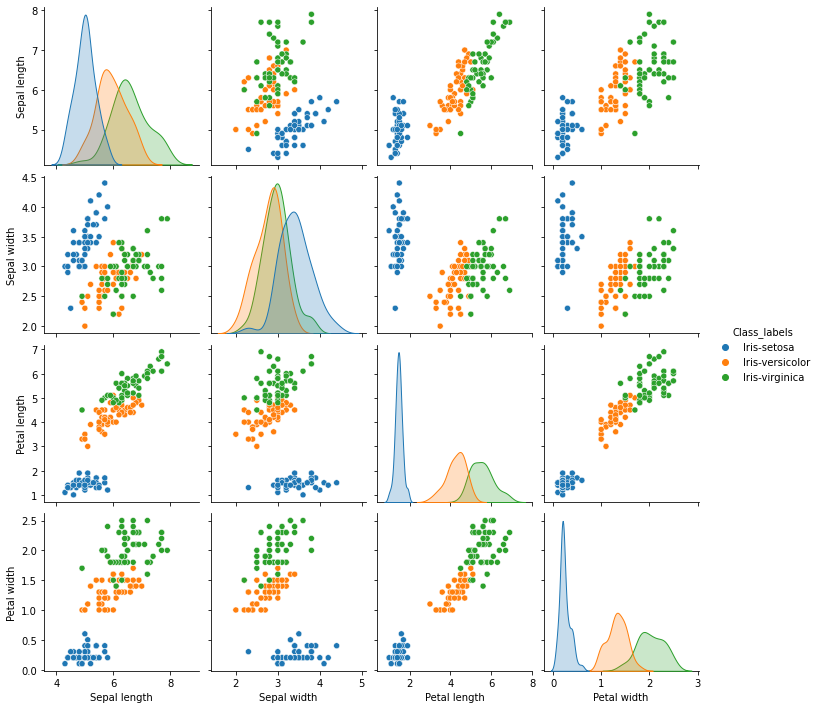

In [4]:
sb.pairplot(data_set, hue='Class_labels')

In [5]:
data_set.corr()

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


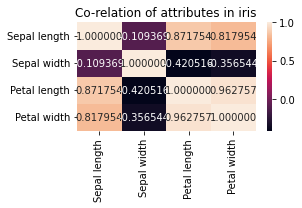

In [6]:
plt.subplots(figsize=(4,2))
sb.heatmap(data_set.corr(), annot=True, fmt="f").set_title("Co-relation of attributes in iris")
plt.show()

In [7]:
data_set.tail()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
data_set.shape

(150, 5)

In [9]:
data_set.dtypes

Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Class_labels     object
dtype: object

In [10]:
data = data_set.values
X = data[:,0:4]
Y = data[:,4]

In [11]:
data_set.isnull()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
data_set.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class_labels    0
dtype: int64

In [13]:
data_set.columns

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Class_labels'],
      dtype='object')

In [14]:
data_set.nunique()

Sepal length    35
Sepal width     23
Petal length    43
Petal width     22
Class_labels     3
dtype: int64

In [15]:
data_set.groupby('Class_labels').size()

Class_labels
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [16]:
data_set.Class_labels.nunique()

3

<AxesSubplot:>

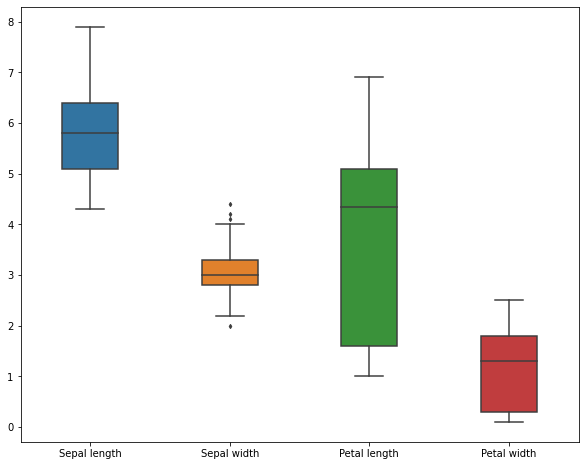

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
sb.boxplot(data=data_set, width=0.4,ax=ax, fliersize=3 )

<AxesSubplot:>

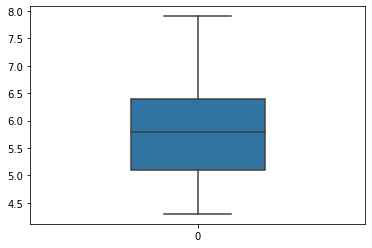

In [18]:
fig, ax = plt.subplots(figsize=(6,4))
sb.boxplot(data=data_set["Sepal length"], width=0.4,ax=ax, fliersize=3 )

<AxesSubplot:>

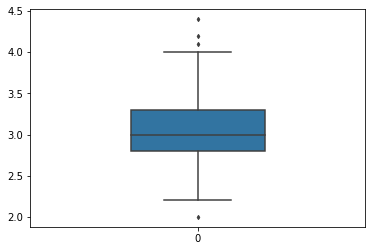

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
sb.boxplot(data=data_set["Sepal width"], width=0.4,ax=ax, fliersize=3 )

<AxesSubplot:>

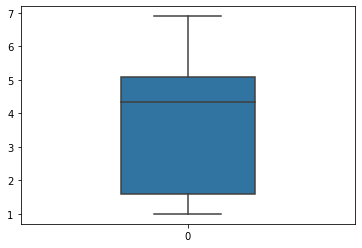

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
sb.boxplot(data=data_set["Petal length"], width=0.4,ax=ax, fliersize=3 )

<AxesSubplot:>

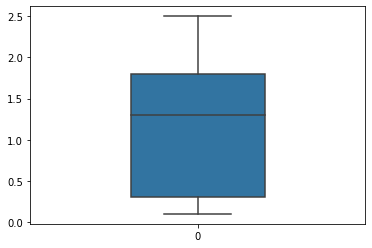

In [21]:
fig, ax = plt.subplots(figsize=(6,4))
sb.boxplot(data=data_set["Petal width"], width=0.4,ax=ax, fliersize=3 )

In [22]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

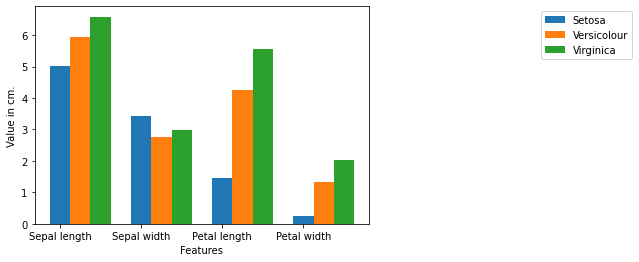

In [23]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.8,1))
plt.show()

In [24]:
#Model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [25]:
data_set

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [27]:
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

In [28]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


SCATTERPLOTS

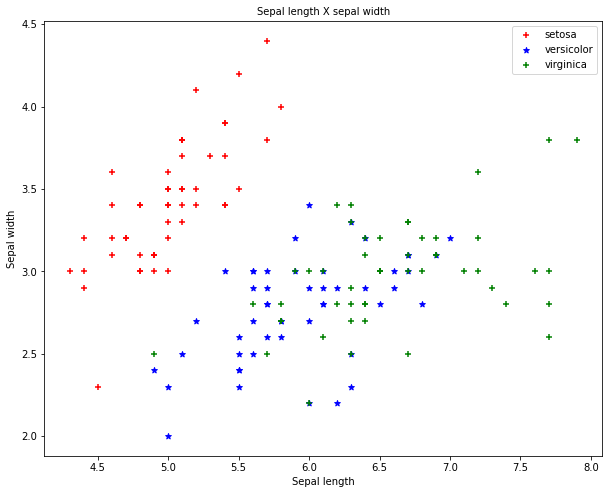

In [29]:
#Scatterplot of the dataset(sepal length x sepal width)
setosa=data_set[data_set['Class_labels']=="Iris-setosa"]
versicolor= data_set[data_set['Class_labels']=="Iris-versicolor"]
virginica=data_set[data_set['Class_labels']=="Iris-virginica"]

plt.figure(figsize=(10,8))
plt.scatter(setosa['Sepal length'],setosa['Sepal width'],c="red", label="setosa", marker='+')
plt.scatter(versicolor['Sepal length'],versicolor['Sepal width'],c="blue", label="versicolor", marker='*')
plt.scatter(virginica['Sepal length'],virginica['Sepal width'],c="green", label="virginica", marker='+')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Sepal length X sepal width", fontsize=10)
plt.legend()
plt.show()

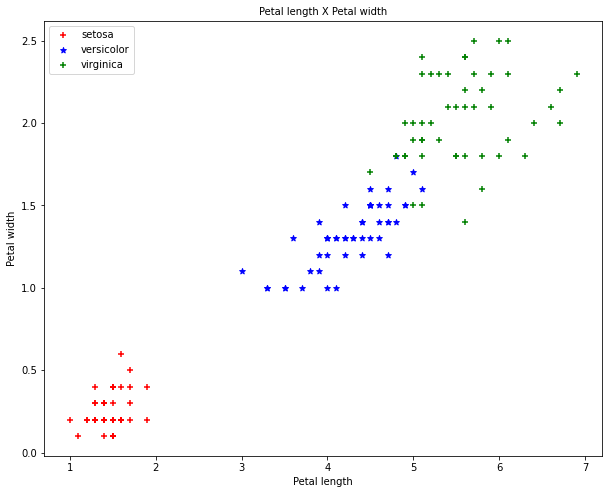

In [30]:
#scatterplot of the dataset(petal length x petal width)
setosa=data_set[data_set['Class_labels']=="Iris-setosa"]
versicolor= data_set[data_set['Class_labels']=="Iris-versicolor"]
virginica=data_set[data_set['Class_labels']=="Iris-virginica"]

plt.figure(figsize=(10,8))
plt.scatter(setosa['Petal length'],setosa['Petal width'],c="red", label="setosa", marker='+')
plt.scatter(versicolor['Petal length'],versicolor['Petal width'],c="blue", label="versicolor", marker='*')
plt.scatter(virginica['Petal length'],virginica['Petal width'],c="green", label="virginica", marker='+')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Petal length X Petal width", fontsize=10)
plt.legend()
plt.show()

In [31]:
x=data_set.drop(columns="Class_labels")
y=data_set["Class_labels"]

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

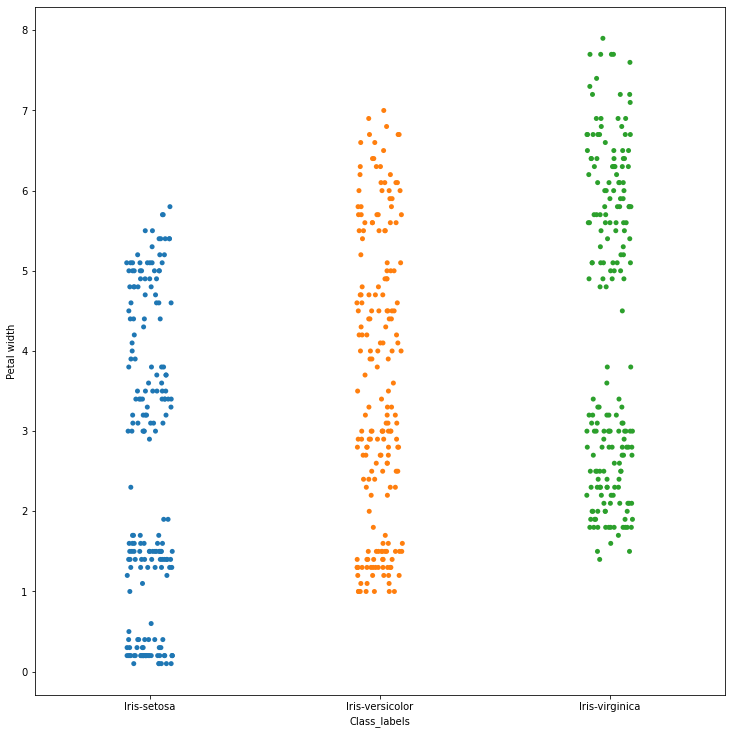

In [32]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot (2,2,plotnumber)
        sb.stripplot(y, x[column])

plotnumber+=1

plt.tight_layout()

In [33]:
print("X_train:", len(X_train))
print("X_test:", len(X_test))
print("y_train:", len(y_train))
print("y_test:", len(y_test))

X_train: 120
X_test: 30
y_train: 120
y_test: 30


LABEL ENCODING

In [34]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
LabEn = LabelEncoder()

In [35]:
data_set['Class_labels']= LabEn.fit_transform(data_set['Class_labels'])
data_set.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
x = data_set.drop(columns=['Class_labels'])
y = data_set['Class_labels']
x[:3]

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [37]:
x[:4]

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [38]:
y[:3]

0    0
1    0
2    0
Name: Class_labels, dtype: int32

MODEL BUILDING

In [39]:
#REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
PredictOutcome = model.predict(X_test)
print("Predicted Outcome",PredictOutcome)

Predicted Outcome ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [42]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [43]:
print("training accuracy :", accuracy_score(y_train, y_train_pred))
print("test accuracy :", accuracy_score(y_test, y_test_pred))

training accuracy : 0.9833333333333333
test accuracy : 0.9666666666666667
